In [18]:
library(CAGEfightR)
library(GenomicFeatures)
library(diptest)
setwd("./soybean_data/stripe-seq_data/")

In [24]:
bw_plus <- BigWigFileList(c("W82.Flower.plus.rd.bw","W82.Leaf.plus.rd.bw",
                            "W82.Nodule.plus.rd.bw","W82.Pod.plus.rd.bw",
                            "W82.Root.plus.rd.bw","W82.Seed.plus.rd.bw",
                            "W82.Shoot.plus.rd.bw","W82.Stemtip.plus.rd.bw"))

bw_minus <- BigWigFileList(c("W82.Flower.minus.rd.bw","W82.Leaf.minus.rd.bw",
                             "W82.Nodule.minus.rd.bw","W82.Pod.minus.rd.bw",
                             "W82.Root.minus.rd.bw","W82.Seed.minus.rd.bw",
                             "W82.Shoot.minus.rd.bw","W82.Stemtip.minus.rd.bw"))

names(bw_plus) <- c("Flower","Leaf",
                    "Nodule","Pod",
                    "Root","Seed",
                    "Shoot","Stemtip")

names(bw_minus) <-  c("Flower","Leaf",
                      "Nodule","Pod",
                      "Root","Seed",
                      "Shoot","Stemtip")

In [25]:
Gm <- seqinfo(bw_plus[[1]])
Gm

Seqinfo object with 20 sequences from an unspecified genome:
  seqnames seqlengths isCircular genome
  Chr01      56831624       <NA>   <NA>
  Chr02      48577505       <NA>   <NA>
  Chr03      45779781       <NA>   <NA>
  Chr04      52389146       <NA>   <NA>
  Chr05      42234498       <NA>   <NA>
  ...             ...        ...    ...
  Chr16      37887014       <NA>   <NA>
  Chr17      41641366       <NA>   <NA>
  Chr18      58018742       <NA>   <NA>
  Chr19      50746916       <NA>   <NA>
  Chr20      47904181       <NA>   <NA>

In [26]:
CTSSs <- quantifyCTSSs(plusStrand=bw_plus,
                       minusStrand=bw_minus,
                       genome=Gm)
TSSs <- quickTSSs(CTSSs)

Checking design...

Checking supplied genome compatibility...

Iterating over 1 genomic tiles in 8 samples using 102 worker(s)...

Importing CTSSs from plus strand...

Importing CTSSs from minus strand...

Merging strands...

Formatting output...

### CTSS summary ###

Number of samples: 8

Number of CTSSs: 2.318 millions

Sparsity: 78.38 %

Type of rowRanges: StitchedGPos

Final object size: 61.90 MB

 - Running calcTPM and calcPooled:

Calculating library sizes...

Calculating TPM...


 - Running clusterUnidirectionally:

Splitting by strand...

Slice-reduce to find clusters...

Calculating statistics...

Preparing output...

Tag clustering summary:

  Width  Count Percent
  Total 656075 1e+02 %
    >=1 492084 8e+01 %
   >=10 148200 2e+01 %
  >=100  15781 2e+00 %
 >=1000     10 2e-03 %


 - Running quantifyClusters:

Finding overlaps...

Aggregating within clusters...



In [28]:

txdb <- makeTxDbFromGFF(file="../genome_file/Gmax_v2.0_changed.rmscaff.gff3",
                         #file="Gmax_merged.gff3",
                        format="gff3",
                        dataSource="gff for Gm",
                       organism="Glycine max")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [29]:
# Annotate both TSSs and enhancers
CTSSs <- assignTxType(CTSSs, txModels=txdb,
                     outputColumn="txType")
#####
CTSSs <- assignTxID(CTSSs,
                   txModels=txdb,
                   outputColumn="txID")

Finding hierachical overlaps...

### Overlap summary: ###

      txType  count percentage
1   promoter 673537       29.1
2   proximal 104049        4.5
3    fiveUTR 412753       17.8
4   threeUTR  25428        1.1
5        CDS 839307       36.2
6       exon      0        0.0
7     intron 132715        5.7
8  antisense  49923        2.2
9 intergenic  80621        3.5

Extracting transcripts...

Finding hierachical overlaps...

### Overlap Summary: ###

Features overlapping transcripts: 94.37 %

Number of unique transcripts: 77558



In [30]:
CTSSs <- calcTPM(CTSSs,
                 inputAssay="counts",
                 outputAssay="TPM",
                 outputColumn="subsetTags")

Calculating library sizes...

Calculating TPM...



In [31]:
CTSSs

class: RangedSummarizedExperiment 
dim: 2318333 8 
metadata(0):
assays(2): counts TPM
rownames: NULL
rowData names(2): txType txID
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [32]:
###export a table
result <- data.frame(as.data.frame(CTSSs@rowRanges),
                     as.data.frame(as.matrix(CTSSs@assays@data@listData$counts)),
                    as.data.frame(as.matrix(CTSSs@assays@data@listData$TPM)))

write.table(result,
            file= "../result_file/CTSS_raw.txt",
            col.names=T,row.names=F,
            sep="\t",quote=F)

In [33]:
CTSSs <- calcPooled(CTSSs, inputAssay="TPM")
rowRanges(CTSSs)

StitchedGPos object with 2318333 positions and 3 metadata columns:
            seqnames       pos strand |   txType                   txID
               <Rle> <integer>  <Rle> | <factor>            <character>
        [1]    Chr01    116022      + | promoter Glyma.01G000600.1.Wm..
        [2]    Chr01    116026      + | promoter Glyma.01G000600.1.Wm..
        [3]    Chr01    116072      + | promoter Glyma.01G000600.1.Wm..
        [4]    Chr01    116088      + | promoter Glyma.01G000600.1.Wm..
        [5]    Chr01    116089      + | promoter Glyma.01G000600.1.Wm..
        ...      ...       ...    ... .      ...                    ...
  [2318329]    Chr20  47901250      - | promoter Glyma.20G250200.2.Wm..
  [2318330]    Chr20  47901252      - | promoter Glyma.20G250200.2.Wm..
  [2318331]    Chr20  47901287      - | promoter Glyma.20G250200.2.Wm..
  [2318332]    Chr20  47901289      - | promoter Glyma.20G250200.2.Wm..
  [2318333]    Chr20  47901358      - | promoter Glyma.20G250200.2.Wm

In [34]:
CTSSs <- calcSupport(CTSSs,inputAssay="TPM", 
                            outputColumn="support", 
                            unexpressed=1)
table(rowRanges(CTSSs)$support)


      0       1       2       3       4       5       6       7       8 
1825475  327548   63415   30885   19682   14658   12443   12008   12219 

In [35]:
## ----subset, tidy=FALSE-------------------------------------------------------
supportedCTSSs <- subset(CTSSs, support > 0)
#supportedCTSSs <- calcTPM(supportedCTSSs, totalTags="totalTags")
supportedCTSSs <- calcPooled(supportedCTSSs)

Warning message in calcPooled(supportedCTSSs):
"object already has a column named score in rowData: It will be overwritten!"


In [36]:
result <-data.frame(as.data.frame(supportedCTSSs@rowRanges),
                    as.data.frame(as.matrix(assay(supportedCTSSs,"counts"))),
                    as.data.frame(as.matrix(assay(supportedCTSSs,"TPM"))))
write.table(result,
            file="../result_file/supportTSSs.txt",
            col.names=T,row.names=F,
            sep="\t",quote=F)

In [37]:
#change !!!
prefiltered_TCs <- clusterUnidirectionally(supportedCTSSs, 
                                           pooledCutoff=0, 
                                           mergeDist=20)
prefiltered_TCs

Splitting by strand...

Slice-reduce to find clusters...

Calculating statistics...

Preparing output...

Tag clustering summary:

  Width  Count Percent
  Total 193579   100 %
    >=1 151172    78 %
   >=10  40448    21 %
  >=100   1959     1 %
 >=1000      0     0 %



GRanges object with 193579 ranges and 2 metadata columns:
                            seqnames            ranges strand |     score
                               <Rle>         <IRanges>  <Rle> | <numeric>
      Chr01:116089-116110;+    Chr01     116089-116110      + |  20.03456
      Chr01:116131-116134;+    Chr01     116131-116134      + |  17.41587
      Chr01:116213-116213;+    Chr01            116213      + |   1.73737
      Chr01:116245-116245;+    Chr01            116245      + |   1.19612
      Chr01:117419-117419;+    Chr01            117419      + |   1.38735
                        ...      ...               ...    ... .       ...
  Chr20:47900986-47900986;-    Chr20          47900986      - |   2.44671
  Chr20:47901093-47901110;-    Chr20 47901093-47901110      - |  12.71380
  Chr20:47901180-47901201;-    Chr20 47901180-47901201      - |  26.73318
  Chr20:47901226-47901250;-    Chr20 47901226-47901250      - |   9.13046
  Chr20:47901289-47901289;-    Chr20          47901289

In [38]:
#potential change the sample number.
sup_TSSs <- quantifyClusters(supportedCTSSs,
                                      clusters=prefiltered_TCs,
                                      inputAssay="counts")
sup_TSSs

Finding overlaps...

Aggregating within clusters...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(1): counts
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(2): score thick
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [39]:
## ----supportOnTPM, tidy=FALSE-------------------------------------------------
# Calculate TPM using pre-calculated total tags:
Unidirectional <- calcTPM(sup_TSSs,
                          inputAssay="counts", 
                          outputAssay="TPM", 
                          outputColumn="subsetTags")
Unidirectional

Calculating library sizes...

Warning message in calcTotalTags(object = object, inputAssay = inputAssay, outputColumn = outputColumn):
"object already has a column named subsetTags in colData: It will be overwritten!"
Calculating TPM...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(2): score thick
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [40]:
# Only TSSs expressed at more than 1 TPM in more than 2 samples
#Unidirectional <- subsetBySupport(Unidirectional,
#                                  inputAssay="TPM",
#                                  unexpressed=0,
#                                  minSamples=2)
#TSSs expressed at more than 0 TPM as least in 1 samples
Unidirectional <- subsetBySupport(Unidirectional,
                                     inputAssay="TPM",
                                     unexpressed=1,
                                     minSamples=0)
Unidirectional

Calculating support...

Subsetting...

Removed 0 out of 193579 regions (0%)



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(3): score thick support
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [41]:
## ----assignTxID, tidy=FALSE---------------------------------------------------
Unidirectional <- assignTxID(Unidirectional,
                            txModels=txdb,
                            outputColumn="txID")

Extracting transcripts...

Finding hierachical overlaps...

### Overlap Summary: ###

Features overlapping transcripts: 93.94 %

Number of unique transcripts: 68290



In [42]:
## ----multipleTxs, tidy=FALSE--------------------------------------------------
rowRanges(Unidirectional)[5:6]
#export(rowRanges(Unidirectional),"TC.bed","BED")

GRanges object with 2 ranges and 4 metadata columns:
                        seqnames    ranges strand |     score     thick
                           <Rle> <IRanges>  <Rle> | <numeric> <IRanges>
  Chr01:117419-117419;+    Chr01    117419      + |   1.38735    117419
  Chr01:118130-118130;+    Chr01    118130      + |   1.09059    118130
                          support                   txID
                        <integer>            <character>
  Chr01:117419-117419;+         1 Glyma.01G000600.1.Wm..
  Chr01:118130-118130;+         1 Glyma.01G000600.1.Wm..
  -------
  seqinfo: 20 sequences from an unspecified genome

In [43]:
## ----assignTxType, tidy=FALSE-------------------------------------------------
Unidirectional <- assignTxType(Unidirectional,
                              txModels=txdb,
                              outputColumn="txType")

Finding hierachical overlaps...

### Overlap summary: ###

      txType count percentage
1   promoter 54851       28.3
2   proximal  9585        5.0
3    fiveUTR 33092       17.1
4   threeUTR  1786        0.9
5        CDS 69569       35.9
6       exon     0        0.0
7     intron 12957        6.7
8  antisense  4832        2.5
9 intergenic  6907        3.6



In [44]:
## ----swappedTxType, tidy=FALSE------------------------------------------------
Unidirectional <- assignTxType(Unidirectional,
                              txModels=txdb,
                              outputColumn="peakTxType",
                              swap="thick")

Finding hierachical overlaps with swapped ranges...

### Overlap summary: ###

      txType count percentage
1   promoter 52878       27.3
2   proximal  9870        5.1
3    fiveUTR 34187       17.7
4   threeUTR  1784        0.9
5        CDS 69942       36.1
6       exon     0        0.0
7     intron 13175        6.8
8  antisense  4824        2.5
9 intergenic  6919        3.6



In [45]:
# Calculate shape
Unidirectional <- calcShape(Unidirectional,
                           pooled=supportedCTSSs,
                           outputColumn = "IQR",
                           shapeFunction = shapeIQR,
                           lower=0.25, upper=0.75)
Unidirectional
Unidirectional <- calcShape(Unidirectional,
                        pooled=supportedCTSSs,
                        outputColumn = "Entropy",
                        shapeFunction = shapeEntropy
                        )
Unidirectional

Splitting by strand...

Applying function to each cluster...

Preparing output output...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(7): score thick ... peakTxType IQR
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

Splitting by strand...

Applying function to each cluster...

Preparing output output...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(8): score thick ... IQR Entropy
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

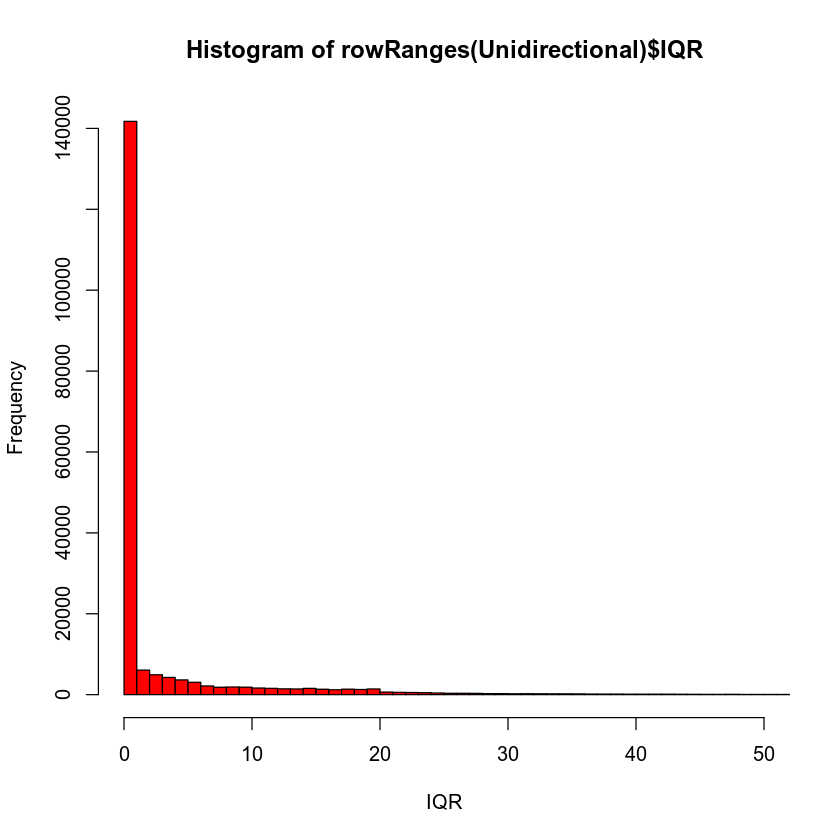

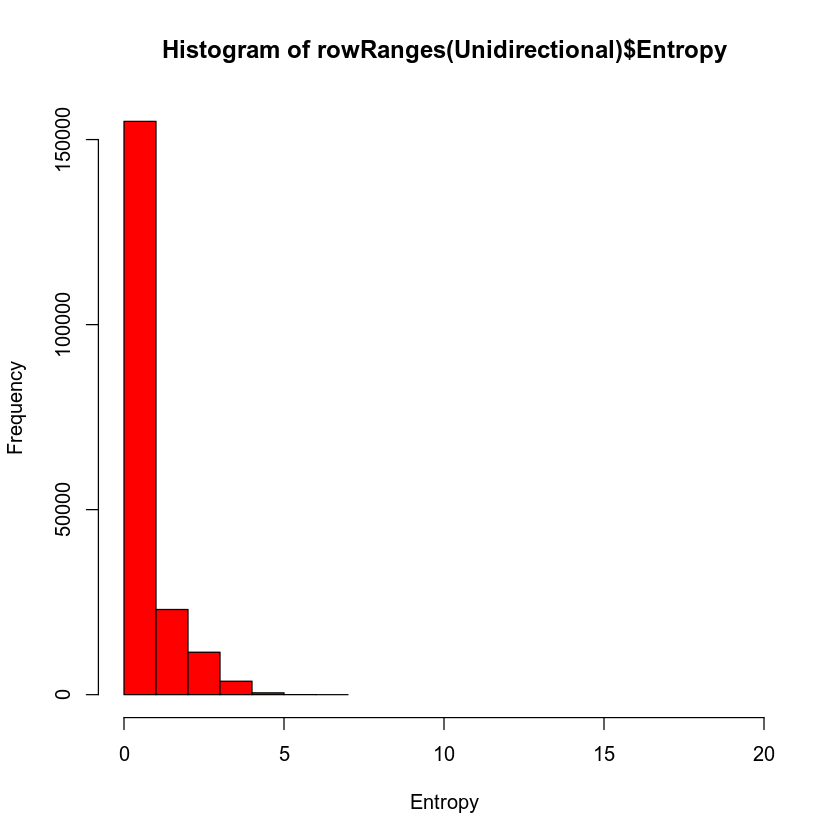

In [46]:
## ----histIQR, tidy=FALSE------------------------------------------------------
hist(rowRanges(Unidirectional)$IQR,
     breaks=max(rowRanges(Unidirectional)$IQR),
     xlim=c(0,50), 
     xlab = "IQR", 
     col="red")

hist(rowRanges(Unidirectional)$Entropy,
     breaks=max(rowRanges(Unidirectional)$Entropy),
     xlim=c(0,20), 
     xlab = "Entropy", 
     col="red")

In [47]:
## ----customShape, tidy=FALSE--------------------------------------------------
# Write a function that quantifies the lean of a TSS

TSRshapeIndex <- function(x) {
  x <- as.vector(x)
  tagcount <- sum(x)  
  SI <- suppressWarnings(2+sum(ifelse(x > 0, (x/tagcount) * log2(x/tagcount), 0)))  
  return(SI)
}

TSRshapeIndex <- function(x) {
  x <- as.vector(x)
  tagcount <- sum(x) 
  SI <- suppressWarnings(2+sum(ifelse(x > 0, (x/tagcount) * log2(x/tagcount), 0))) 
  return(SI)
}

TSRmshapeIndex <- function(x) {
  x <- as.vector(x)
  tagcount <- sum(x)
  tsscount <- length(x)
  mSI <- suppressWarnings(1+sum(ifelse((tsscount != 1 & x != 0), (x/tagcount) * log((x/tagcount))/log(tsscount), 0)))
  return(mSI)
}

TSRshapiro <- function(x) {
  x <- as.vector(x)
  x[1]<-x[1]+0.0000001 
  shapiro <-suppressWarnings(ifelse(length(x) >=3, shapiro.test(x)$p.value,0))
  return(shapiro)
}


TSRdip <- function(x) {
  x <- as.vector(x)
  dip <-suppressWarnings(ifelse(length(x) >=3, dip.test(x)$p.value,1))
  return(dip)
}

In [48]:
Unidirectional <- calcShape(Unidirectional,
                    pooled=supportedCTSSs,
                    outputColumn = "SI",
                    shapeFunction = TSRshapeIndex)
Unidirectional

Splitting by strand...

Applying function to each cluster...

Preparing output output...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(9): score thick ... Entropy SI
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [49]:
Unidirectional <- calcShape(Unidirectional,
                        pooled=supportedCTSSs,
                        outputColumn = "mSI",
                        shapeFunction = TSRmshapeIndex)
Unidirectional

Splitting by strand...

Applying function to each cluster...

Preparing output output...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(10): score thick ... SI mSI
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [50]:
Unidirectional <- calcShape(Unidirectional,
                        pooled=supportedCTSSs,
                        outputColumn = "shapiro",
                        shapeFunction = TSRshapiro)
Unidirectional

Splitting by strand...

Applying function to each cluster...

Preparing output output...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(11): score thick ... mSI shapiro
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

In [53]:
Unidirectional <- calcShape(Unidirectional,
                        pooled=supportedCTSSs,
                        outputColumn = "Dip",
                        shapeFunction = TSRdip)
Unidirectional

Splitting by strand...

Applying function to each cluster...

Preparing output output...



class: RangedSummarizedExperiment 
dim: 193579 8 
metadata(0):
assays(2): counts TPM
rownames(193579): Chr01:116089-116110;+ Chr01:116131-116134;+ ...
  Chr20:47901226-47901250;- Chr20:47901289-47901289;-
rowData names(12): score thick ... shapiro Dip
colnames(8): Flower Leaf ... Shoot Stemtip
colData names(1): subsetTags

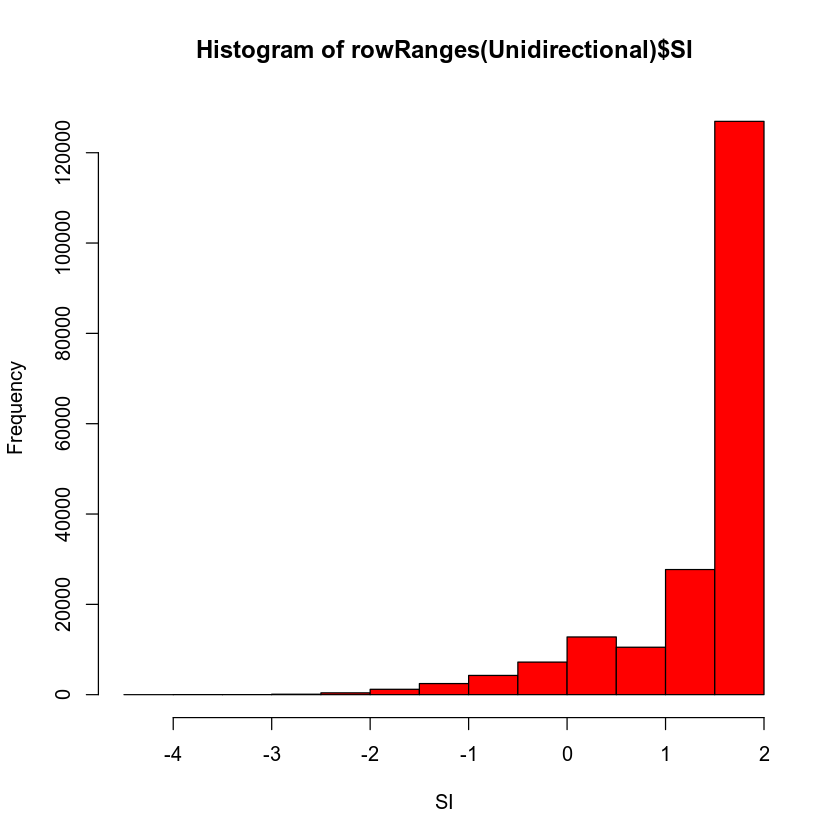

In [54]:
hist(rowRanges(Unidirectional)$SI,
    # breaks=max(rowRanges(Unidirectional)$SI),
     #  xlim=c(0,20), 
     xlab = "SI", 
     col="red")

In [55]:
result <- data.frame(as.data.frame(Unidirectional@rowRanges),
                   as.data.frame(as.matrix(Unidirectional@assays@data@listData$counts)),
                   as.data.frame(as.matrix(Unidirectional@assays@data@listData$TPM)))

write.table(as.data.frame(result),
            file="../result_file/Unidirection_result.txt",
            col.names=T,row.names=F,
            sep="\t",quote=F)

In [56]:
BCs <- clusterBidirectionally(supportedCTSSs, balanceThreshold=0)#0.95

Pre-filtering bidirectional candidate regions...

Retaining for analysis: 2%

Splitting by strand...

Calculating windowed coverage on plus strand...

Calculating windowed coverage on minus strand...

Calculating balance score...

Slice-reduce to find bidirectional clusters...

Calculating statistics...

Preparing output...

# Bidirectional clustering summary:

Number of bidirectional clusters: 929

Maximum balance score: 1

Minimum balance score: 0.707106781186548

Maximum width: 1989

Minimum width: 603



In [57]:
BCs <- calcBidirectionality(BCs, samples=supportedCTSSs)

BCs <- quantifyClusters(supportedCTSSs,
                        clusters=BCs,
                        inputAssay="counts")

BCs <- subsetBySupport(BCs,
                       inputAssay="counts",
                       unexpressed=0,
                       minSamples=0)

Finding overlaps...

Aggregating within clusters...

Calculating support...

Subsetting...

Removed 0 out of 929 regions (0%)



In [58]:
Bidirectional <- calcTPM(BCs,
                         inputAssay="counts", 
                         outputAssay="TPM", 
                         outputColumn="subsetTags")

Bidirectional <- subsetBySupport(Bidirectional,
                                 inputAssay="TPM",
                                 unexpressed=1,
                                 minSamples=0)

Bidirectional <- assignTxType(Bidirectional,
                              txModels=txdb,
                              outputColumn="txType")

Bidirectional <- assignTxID(Bidirectional,
                            txModels=txdb,
                            outputColumn="txID")

Calculating library sizes...

Warning message in calcTotalTags(object = object, inputAssay = inputAssay, outputColumn = outputColumn):
"object already has a column named subsetTags in colData: It will be overwritten!"
Calculating TPM...

Calculating support...

Warning message in calcSupport(object = object, inputAssay = inputAssay, outputColumn = outputColumn, :
"object already has a column named support in rowData: It will be overwritten!"
Subsetting...

Removed 0 out of 929 regions (0%)

Finding hierachical overlaps...

### Overlap summary: ###

      txType count percentage
1   promoter   501       53.9
2   proximal    24        2.6
3    fiveUTR   103       11.1
4   threeUTR    69        7.4
5        CDS   198       21.3
6       exon     0        0.0
7     intron    16        1.7
8  antisense     0        0.0
9 intergenic    18        1.9

Extracting transcripts...

Finding hierachical overlaps...

### Overlap Summary: ###

Features overlapping transcripts: 98.06 %

Number of uniqu

In [59]:
# Only keep intronic and intergenic enhancers
#Bidirectional <- subset(Bidirectional,
#                               txType %in% c("intron", "intergenic"))
result<-data.frame(as.data.frame(Bidirectional@rowRanges),
                   as.data.frame(as.matrix(Bidirectional@assays@data@listData$counts)),
                   as.data.frame(as.matrix(Bidirectional@assays@data@listData$TPM)))

write.table(as.data.frame(result),
            file = "../result_file/Bidirection_result.txt",
            col.names=T,row.names=F,
            sep="\t",quote=F)
